<a href="https://colab.research.google.com/github/aiswaryam2005/Fake-News-Detection-System-using-ML-and-DL/blob/main/Fakenews_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

def preprocess_text(texts):
    # Define a list of Malayalam stopwords
    malayalam_stopwords = set([
        'അത്', 'അവൻ', 'അവ', 'ആ', 'ഇത്', 'ഇവ', 'ആയിരം', 'എന്നാൽ', 'എന്ത്', 'എങ്ങനെ', 'പക്ഷേ', 'അതെ',
        'എന്തായിരിക്കും', 'പോയി', 'സമയം', 'ഇവിടെ', 'നല്ല', 'അതുകൊണ്ട്', 'നിലവിൽ', 'എന്നാൽ', 'ഞാൻ', 'നല്ല',
        'വരെ', 'ആയിരം', 'സമ്പൂർണമായ', 'നോക്കുക', 'ഒരു', 'വർഷം'
    ])

    # Combine English and Malayalam stopwords
    stop_words = set(stopwords.words('english')).union(malayalam_stopwords)
    lemmatizer = WordNetLemmatizer()

    preprocessed_texts = []
    for text in texts:
        # Normalize Malayalam text written in English (basic normalization, no external library)
        text = re.sub(r'[\u0D00-\u0D7F]', '', text)  # Remove Malayalam characters if necessary
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)

        # Remove special characters, numbers, and punctuation
        text = re.sub(r'[^a-zA-Z\u0D00-\u0D7F\s]', '', text)  # Keep Malayalam characters

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords and lemmatize tokens
        filtered_tokens = [
            lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
        ]

        # Join tokens back into a single string
        preprocessed_text = ' '.join(filtered_tokens)
        preprocessed_texts.append(preprocessed_text)

    return preprocessed_texts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Load and preprocess data
data = load_data('/content/drive/MyDrive/Fake_train.csv')
print("Training Data:")
print(data)
print("--------------------------------------------------------------------------------------------------------------")
X, y = data['text'], data['label']
X_preprocessed = preprocess_text(X)
print("Preprocessed Data:")
print(X_preprocessed)
print("--------------------------------------------------------------------------------------------------------------")

# Feature extraction
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X_preprocessed)
print("TF-IDF Features:")
print(X_tfidf)
print("--------------------------------------------------------------------------------------------------------------")
feature_names = tfidf.get_feature_names_out()
print("Feature Names:")
print(feature_names)
print("--------------------------------------------------------------------------------------------------------------")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

# Create a DataFrame to display the predictions alongside the true labels
df_predictions = pd.DataFrame({
    'True Label': y_test.tolist(),
    'Predicted Label': y_pred.tolist()
})

# Print the table
print(df_predictions)
print("--------------------------------------------------------------------------------------------------------------")

# Calculate accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Training Data:
                                                   text     label
0                     നല്ല അവതരണം. സത്യം പുറത്തു വരട്ടെ      Fake
1                                           Masha Allah      Fake
2     അന്വേഷണം കഴിയുമ്പോൾ,. C. A. A. യ്ക്ക് എതിരായ ക...      Fake
3       Illathentha avaru purath vidayittalland verenth      Fake
4     Barana pakshathin matoru niyamam.nalla moyanth...  original
...                                                 ...       ...
3252  വീണാ ജോർജ് എന്ന ഒരു ആരോഗ്യ മന്ത്രി വന്നതിനു ശേ...  original
3253                                 ഇതാണ് പിണുവാതിര😂😂😂  original
3254                                   കേസ് എടുക്കണം 💯👍  original
3255      എല്ലാത്തിനേം 501 സോപ്പിട്ട് കളിപ്പിച്ച് വിടണം  original
3256  Day by day leaders r acting like a fool in dev...  original

[3257 rows x 2 columns]
--------------------------------------------------------------------------------------------------------------
Preprocessed Data:
['', 'masha allah', 'c', 'illathentha 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary resources if not already done
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
def preprocess_text(texts, language='english'):
    if language == 'malayalam':
        stop_words = set([
            'അത്', 'അവൻ', 'അവ', 'ആ', 'ഇത്', 'ഇവ', 'ആയിരം', 'എന്നാൽ', 'എന്ത്', 'എങ്ങനെ', 'പക്ഷേ', 'അതെ',
            'എന്തായിരിക്കും', 'പോയി', 'സമയം', 'ഇവിടെ', 'നല്ല', 'അതുകൊണ്ട്', 'നിലവിൽ', 'എന്നാൽ', 'ഞാൻ', 'നല്ല',
            'വരെ', 'ആയിരം', 'സമ്പൂർണമായ', 'നോക്കുക', 'ഒരു', 'വർഷം'
        ])
    else:
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()

    preprocessed_texts = []
    for text in texts:
        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)

        # Remove special characters (retain Malayalam characters if processing Malayalam)
        if language == 'malayalam':
            text = re.sub(r'[^a-zA-Z\u0D00-\u0D7F\s]', '', text)
        else:
            text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stop words and lemmatize (English only)
        if language == 'english':
            filtered_tokens = [
                lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
            ]
        else:
            filtered_tokens = [word for word in tokens if word not in stop_words]

        # Join tokens back into a single string
        preprocessed_text = ' '.join(filtered_tokens)
        preprocessed_texts.append(preprocessed_text)

    return preprocessed_texts

# Load dataset
def load_data(file_path):
    return pd.read_csv(file_path)

# Load and preprocess data
data = load_data('/content/drive/MyDrive/Fake_train.csv')
X, y = data['text'], data['label']

# Preprocess English and Malayalam text separately
X_english = preprocess_text(X, language='english')
X_malayalam = preprocess_text(X, language='malayalam')

# Feature extraction using TF-IDF for both English and Malayalam
tfidf_english = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
tfidf_malayalam = TfidfVectorizer(max_features=3000, ngram_range=(1, 2), token_pattern=r'[\u0D00-\u0D7F]+')

X_english_tfidf = tfidf_english.fit_transform(X_english)
X_malayalam_tfidf = tfidf_malayalam.fit_transform(X_malayalam)

# Combine features
X_combined = FeatureUnion([
    ('english_tfidf', tfidf_english),
    ('malayalam_tfidf', tfidf_malayalam)
]).fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Display predictions and evaluation
print(pd.DataFrame({'True Label': y_test.tolist(), 'Predicted Label': y_pred.tolist()}))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


    True Label Predicted Label
0     original        original
1         Fake        original
2     original            Fake
3     original        original
4     original        original
..         ...             ...
647   original        original
648       Fake            Fake
649       Fake        original
650   original        original
651   original        original

[652 rows x 2 columns]
Accuracy: 0.7883435582822086
Classification Report:
               precision    recall  f1-score   support

        Fake       0.85      0.73      0.78       342
    original       0.74      0.86      0.79       310

    accuracy                           0.79       652
   macro avg       0.79      0.79      0.79       652
weighted avg       0.80      0.79      0.79       652



# **Binary Classification**

### **Model 1: SVM with Feature Extraction(TF-IDF)**

In [ ]:
!pip install langdetect
!pip install indic-nlp-library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=acf41c1b915e3d6e49f2572b4cd7f0a9177ece9c29c5d03bdc017171ca78b9eb
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import nltk

# Download necessary resources
nltk.download('stopwords')

# **Preprocessing Function**
def preprocess_text(texts):
    def clean_text(text):
        # Remove URLs, mentions, hashtags, special characters
        text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
        text = re.sub(r"[^\w\s]", "", text)
        return text.lower()

    # Apply cleaning
    texts = texts.apply(clean_text)
    return texts

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Fake_train.csv")  # Replace with your file
X = data["text"]  # The text column
y = data["label"]  # The target column (e.g., 'Original' or 'Fake')

# Preprocess text
X = preprocess_text(X)

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Extract features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words=stopwords.words("english"))
X_tfidf = tfidf.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = svm_model.predict(X_test)

df_results = pd.DataFrame({
    "True Label": label_encoder.inverse_transform(y_test),
    "Predicted Label": label_encoder.inverse_transform(y_pred)
})

print("Predictions Table:")
print(df_results.head(10))  # Display the first 10 predictions

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


# Load the test data
test_data_path = "/content/drive/MyDrive/Fake_test_without_labels.csv"  # Replace with your test data path
test_df = pd.read_csv(test_data_path, sep=",")  # Adjust delimiter based on your test data format

# Check columns in test dataset
print("Columns in test dataset:", test_df.columns)

# Replace 'text' with the actual column name in your test dataset if different
if "text" not in test_df.columns:
    print("Column 'text' not found in test data. Update the column name.")
else:
    # Preprocess and transform the test data
    X_test_text = preprocess_text(test_df["text"])
    X_test_tfidf = tfidf.transform(X_test_text)

    # Predict and save results
    predictions = svm_model.predict(X_test_tfidf)
    predicted_labels = label_encoder.inverse_transform(predictions)

    # Save only the `Id` and predicted labels
    output_df = pd.DataFrame({
        "Id": test_df["Id"],
        "Labels": predicted_labels
    })

    # Save the results
    output_df.to_csv("/content/drive/MyDrive/Blue_Ray/Blue_ray_Malayalam_task1_run1.csv", sep=",", index=False)
    print("Predictions saved successfully.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Predictions Table:
  True Label Predicted Label
0   original        original
1       Fake        original
2   original            Fake
3   original        original
4   original        original
5       Fake            Fake
6       Fake        original
7       Fake            Fake
8       Fake            Fake
9   original        original
Accuracy: 0.8113496932515337
Classification Report:
               precision    recall  f1-score   support

        Fake       0.88      0.74      0.80       342
    original       0.75      0.89      0.82       310

    accuracy                           0.81       652
   macro avg       0.82      0.82      0.81       652
weighted avg       0.82      0.81      0.81       652

Columns in test dataset: Index(['Id', 'text'], dtype='object')
Predictions saved successfully.


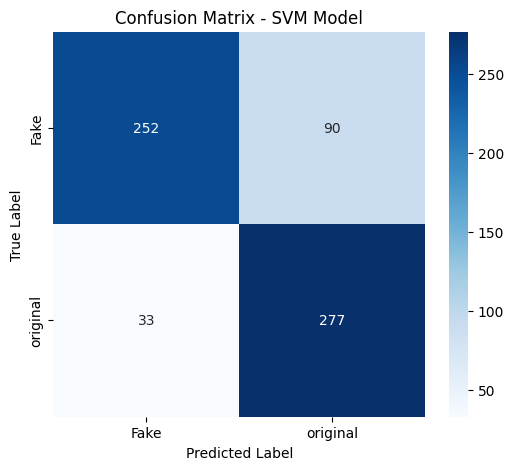

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM Model")
plt.show()


Text Preprocessing:

Removes URLs, hashtags, and special characters.
Detects Malayalam text and transliterates it to Hindi script for better vectorization.
Feature Extraction:

Uses TF-IDF with bigrams and stop-word removal for English text.
Model:

Implements SVM with a linear kernel and uses TF-IDF features.
Evaluation:

Outputs Accuracy and a Classification Report.


### **Logistic Regression with TF-IDF**

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import nltk

# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Preprocessing Function
def preprocess_text(texts):
    malayalam_stopwords = set([
        'അത്', 'അവൻ', 'അവ', 'ആ', 'ഇത്', 'ഇവ', 'ആയിരം', 'എന്നാൽ', 'എന്ത്', 'എങ്ങനെ', 'പക്ഷേ', 'അതെ',
        'എന്തായിരിക്കും', 'പോയി', 'സമയം', 'ഇവിടെ', 'നല്ല', 'അതുകൊണ്ട്', 'നിലവിൽ', 'എന്നാൽ', 'ഞാൻ', 'വരെ',
        'വർഷം', 'സമ്പൂർണമായ', 'നോക്കുക', 'ഒരു'
    ])
    english_stopwords = set(stopwords.words("english"))

    def clean_text(text):
        # Remove URLs and special characters
        text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
        text = re.sub(r"[^\w\s]", "", text)
        text = text.lower()

        # Tokenize
        tokens = nltk.word_tokenize(text)

        # Remove stopwords (both English and Malayalam)
        tokens = [word for word in tokens if word not in english_stopwords and word not in malayalam_stopwords]

        return " ".join(tokens)

    # Apply cleaning
    return texts.apply(clean_text)

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Fake_train.csv")  # Replace with your file
X = data["text"]  # Text column
y = data["label"]  # Target column

# Preprocess the text
X_preprocessed = preprocess_text(X)

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X_preprocessed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Train Logistic Regression model
logreg_model = LogisticRegression(max_iter=200)
logreg_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logreg_model.predict(X_test)

# Create a DataFrame to display true and predicted labels
df_results = pd.DataFrame({
    "True Label": label_encoder.inverse_transform(y_test),
    "Predicted Label": label_encoder.inverse_transform(y_pred)
})

print("Predictions Table:")
print(df_results.head(10))  # Display the first 10 predictions
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Load the test data
test_data_path = "/content/drive/MyDrive/Fake_test_without_labels.csv"  # Replace with your test data path
test_df = pd.read_csv(test_data_path, sep=",")  # Adjust delimiter based on your test data format

# Check columns in test dataset
print("Columns in test dataset:", test_df.columns)

# Replace 'text' with the actual column name in your test dataset if different
if "text" not in test_df.columns:
    print("Column 'text' not found in test data. Update the column name.")
else:
    # Preprocess and transform the test data
    X_test_text = preprocess_text(test_df["text"])
    X_test_tfidf = tfidf.transform(X_test_text)

    # Predict and save results
    predictions = logreg_model.predict(X_test_tfidf)
    predicted_labels = label_encoder.inverse_transform(predictions)
    test_df["Predicted Label"] = predicted_labels

    # Save the results
    test_df.to_csv("/content/drive/MyDrive/Blue_Ray/Blue_ray_task1_run2.tsv", sep="\t", index=False)
    print("Predictions saved successfully.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Predictions Table:
  True Label Predicted Label
0   original        original
1       Fake        original
2   original        original
3   original        original
4   original        original
5       Fake            Fake
6       Fake        original
7       Fake            Fake
8       Fake            Fake
9   original        original

Accuracy: 0.8098159509202454

Classification Report:
               precision    recall  f1-score   support

        Fake       0.90      0.71      0.80       342
    original       0.74      0.92      0.82       310

    accuracy                           0.81       652
   macro avg       0.82      0.81      0.81       652
weighted avg       0.83      0.81      0.81       652

Columns in test dataset: Index(['Id', 'text'], dtype='object')
Predictions saved successfully.


Model: Logistic Regression is used as the classifier for binary classification.
Feature Extraction:
TF-IDF with ngram_range=(1, 2) to capture bigrams.
Maximum features are set to 5000 for dimensionality reduction.
Stopwords: Includes both English and a custom set for Malayalam.
Evaluation:
Displays a table of the true and predicted labels.
Calculates metrics: Accuracy and a detailed Classification Report.

### **Random Forest Classifier**

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import nltk

# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')

# Preprocessing Function
def preprocess_text(texts):
    malayalam_stopwords = set([
        'അത്', 'അവൻ', 'അവ', 'ആ', 'ഇത്', 'ഇവ', 'ആയിരം', 'എന്നാൽ', 'എന്ത്', 'എങ്ങനെ', 'പക്ഷേ', 'അതെ',
        'എന്തായിരിക്കും', 'പോയി', 'സമയം', 'ഇവിടെ', 'നല്ല', 'അതുകൊണ്ട്', 'നിലവിൽ', 'എന്നാൽ', 'ഞാൻ', 'വരെ',
        'വർഷം', 'സമ്പൂർണമായ', 'നോക്കുക', 'ഒരു'
    ])
    english_stopwords = set(stopwords.words("english"))

    def clean_text(text):
        # Remove URLs and special characters
        text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
        text = re.sub(r"[^\w\s]", "", text)
        text = text.lower()

        # Tokenize
        tokens = nltk.word_tokenize(text)

        # Remove stopwords (both English and Malayalam)
        tokens = [word for word in tokens if word not in english_stopwords and word not in malayalam_stopwords]

        return " ".join(tokens)

    # Apply cleaning
    return texts.apply(clean_text)

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Fake_train.csv")  # Replace with your file
X = data["text"]  # Text column
y = data["label"]  # Target column

# Preprocess the text
X_preprocessed = preprocess_text(X)

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X_preprocessed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)

# Create a DataFrame to display true and predicted labels
df_results = pd.DataFrame({
    "True Label": label_encoder.inverse_transform(y_test),
    "Predicted Label": label_encoder.inverse_transform(y_pred)
})

print("Predictions Table:")
print(df_results.head(10))  # Display the first 10 predictions
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Load the test data
test_data_path = "/content/drive/MyDrive/Fake_test_without_labels.csv"  # Replace with your test data path
test_df = pd.read_csv(test_data_path, sep=",")  # Adjust delimiter based on your test data format

# Check columns in test dataset
print("Columns in test dataset:", test_df.columns)

# Replace 'text' with the actual column name in your test dataset if different
if "text" not in test_df.columns:
    print("Column 'text' not found in test data. Update the column name.")
else:
    # Preprocess and transform the test data
    X_test_text = preprocess_text(test_df["text"])
    X_test_tfidf = tfidf.transform(X_test_text)

    # Predict and save results
    predictions = rf_model.predict(X_test_tfidf)
    predicted_labels = label_encoder.inverse_transform(predictions)
    test_df["Predicted Label"] = predicted_labels

    # Save the results
    test_df.to_csv("/content/drive/MyDrive/Blue_Ray/Blue_ray_task1_run3.tsv", sep="\t", index=False)
    print("Predictions saved successfully.")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Predictions Table:
  True Label Predicted Label
0   original        original
1       Fake        original
2   original        original
3   original        original
4   original        original
5       Fake            Fake
6       Fake        original
7       Fake            Fake
8       Fake            Fake
9   original        original

Accuracy: 0.7944785276073619

Classification Report:
               precision    recall  f1-score   support

        Fake       0.89      0.69      0.78       342
    original       0.73      0.91      0.81       310

    accuracy                           0.79       652
   macro avg       0.81      0.80      0.79       652
weighted avg       0.81      0.79      0.79       652

Columns in test dataset: Index(['Id', 'text'], dtype='object')
Predictions saved successfully.


Model: Random Forest Classifier with 200 trees (n_estimators=200), which is suitable for high-dimensional datasets like TF-IDF vectors.
Feature Extraction:
TF-IDF with bigram (ngram_range=(1, 2)) to capture more context.
Limit to 5000 features to avoid overfitting.
Stopwords:
Includes both English and custom Malayalam stopwords to improve text cleaning.
Evaluation:
A table showing the True and Predicted labels for the first 10 test examples.
Standard metrics like Accuracy and a Classification Report.


### **Gradient Boosting Classifier**

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from sklearn.utils.class_weight import compute_class_weight
import nltk
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np

# Download necessary resources
nltk.download("stopwords")
nltk.download("punkt")

# Preprocessing Function
def preprocess_text(texts):
    malayalam_stopwords = set([
        'അത്', 'അവൻ', 'അവ', 'ആ', 'ഇത്', 'ഇവ', 'ആയിരം', 'എന്നാൽ', 'എന്ത്', 'എങ്ങനെ', 'പക്ഷേ', 'അതെ',
        'എന്തായിരിക്കും', 'പോയി', 'സമയം', 'ഇവിടെ', 'നല്ല', 'അതുകൊണ്ട്', 'നിലവിൽ', 'എന്നാൽ', 'ഞാൻ', 'വരെ',
        'വർഷം', 'സമ്പൂർണമായ', 'നോക്കുക', 'ഒരു'
    ])
    english_stopwords = set(stopwords.words("english"))

    def clean_text(text):
        # Remove URLs and special characters
        text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
        text = re.sub(r"[^\w\s]", "", text)
        text = text.lower()

        # Tokenize
        tokens = nltk.word_tokenize(text)

        # Remove stopwords (both English and Malayalam)
        tokens = [word for word in tokens if word not in english_stopwords and word not in malayalam_stopwords]

        return " ".join(tokens)

    # Apply cleaning
    return texts.apply(clean_text)

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Fake_train.csv")  # Replace with your file
X = data["text"]  # Text column
y = data["label"]  # Target column

# Preprocess the text
X_preprocessed = preprocess_text(X)

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=8000, ngram_range=(1, 3), analyzer="char_wb")
X_tfidf = tfidf.fit_transform(X_preprocessed)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_tfidf_resampled, y_resampled = smote.fit_resample(X_tfidf, y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_resampled, y_resampled, test_size=0.2, random_state=42)

# Compute class weights
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train Gradient Boosting model with optimized parameters
gb_model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = gb_model.predict(X_test)

# Create a DataFrame to display true and predicted labels
df_results = pd.DataFrame({
    "True Label": label_encoder.inverse_transform(y_test),
    "Predicted Label": label_encoder.inverse_transform(y_pred)
})

print("Predictions Table:")
print(df_results.head(10))  # Display the first 10 predictions
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Load the test data
test_data_path = "/content/drive/MyDrive/Fake_test_without_labels.csv"  # Replace with your test data path
test_df = pd.read_csv(test_data_path, sep=",")  # Adjust delimiter based on your test data format

# Check columns in test dataset
print("Columns in test dataset:", test_df.columns)

# Replace 'text' with the actual column name in your test dataset if different
if "text" not in test_df.columns:
    print("Column 'text' not found in test data. Update the column name.")
else:
    # Preprocess and transform the test data
    X_test_text = preprocess_text(test_df["text"])
    X_test_tfidf = tfidf.transform(X_test_text)

    # Predict and save results
    predictions = rf_model.predict(X_test_tfidf)
    predicted_labels = label_encoder.inverse_transform(predictions)
    test_df["Predicted Label"] = predicted_labels

    # Save the results
    test_df.to_csv("/content/drive/MyDrive/Blue_Ray/Blue_ray_task1_run3.tsv", sep="\t", index=False)
    print("Predictions saved successfully.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Predictions Table:
  True Label Predicted Label
0       Fake            Fake
1       Fake            Fake
2       Fake            Fake
3       Fake        original
4       Fake            Fake
5       Fake        original
6   original        original
7   original        original
8       Fake            Fake
9   original        original

Accuracy: 0.7996987951807228

Classification Report:
               precision    recall  f1-score   support

        Fake       0.81      0.78      0.79       329
    original       0.79      0.82      0.80       335

    accuracy                           0.80       664
   macro avg       0.80      0.80      0.80       664
weighted avg       0.80      0.80      0.80       664



Feature Extraction:

Increased max_features to 8000.
Added ngram_range=(1, 3) for unigrams, bigrams, and trigrams.
Used analyzer="char_wb" for character n-grams, which helps capture subword patterns, especially in Malayalam.
Class Imbalance:

Used SMOTE to balance the dataset by oversampling the minority classes.
Hyperparameter Tuning:

Increased n_estimators to 300.
Reduced learning_rate to 0.05 for finer adjustments.
Set max_depth=6 for better generalization.
Used subsample=0.8 to avoid overfitting.
Class Weights:

Calculated and applied class weights dynamically to handle imbalances further.


### Multinomial Naive Bayes

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Malayalam stopwords
malayalam_stopwords = set([
    'അത്', 'അവൻ', 'അവ', 'ആ', 'ഇത്', 'ഇവ', 'ആയിരം', 'എന്നാൽ', 'എന്ത്', 'എങ്ങനെ', 'പക്ഷേ', 'അതെ',
    'എന്തായിരിക്കും', 'പോയി', 'സമയം', 'ഇവിടെ', 'നല്ല', 'അതുകൊണ്ട്', 'നിലവിൽ', 'എന്നാൽ', 'ഞാൻ', 'നല്ല',
    'വരെ', 'ആയിരം', 'സമ്പൂർണമായ', 'നോക്കുക', 'ഒരു', 'വർഷം'
])

# Preprocessing function
def preprocess_text(texts):
    lemmatizer = WordNetLemmatizer()
    preprocessed_texts = []

    for text in texts:
        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)

        # Remove special characters, numbers, and punctuation
        text = re.sub(r'[^a-zA-Z\u0D00-\u0D7F\s]', '', text)  # Keeps Malayalam script

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords and lemmatize (for English and Malayalam)
        filtered_tokens = [
            lemmatizer.lemmatize(word) for word in tokens
            if word not in stopwords.words('english') and word not in malayalam_stopwords
        ]

        # Join tokens back into a single string
        preprocessed_text = ' '.join(filtered_tokens)
        preprocessed_texts.append(preprocessed_text)

    return preprocessed_texts

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/fake_news_classification_mal_train.csv')  # Adjust 'dataset.csv' with your file's name

# Check the columns
print("Columns before adjustment:", data.columns.tolist())

# If the columns are incorrect, fix them
if len(data.columns) == 1:
    # Split the single column into separate columns
    data = pd.read_csv('/content/drive/MyDrive/fake_news_classification_mal_train.csv', delimiter=',')  # Ensure correct delimiter
    data.columns = data.columns[0].split(',')
    print("Columns after adjustment:", data.columns.tolist())

# Verify data structure
print(data.head())

# Access the 'News' column
X = data['News']
y = data['Label']
print(X.head())

# Preprocess the text
X_preprocessed = preprocess_text(X)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X_preprocessed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Display results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display predictions in a table format
df_predictions = pd.DataFrame({
    'True Label': y_test.tolist(),
    'Predicted Label': y_pred.tolist()
})
print("Predictions:")
print(df_predictions)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Columns before adjustment: ['ID', 'News', 'Label']
                 ID                                               News  \
0  FAKE_MAL_TR_0001  കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...   
1  FAKE_MAL_TR_0002  ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...   
2  FAKE_MAL_TR_0003  പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...   
3  FAKE_MAL_TR_0004  വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...   
4  FAKE_MAL_TR_0005  കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...   

        Label  
0  FALSE       
1  FALSE       
2  FALSE       
3  FALSE       
4  FALSE       
0    കേള്‍വി തകരാറുള്ള കുട്ടികള്‍ക്ക് നടത്തുന്ന സൗജ...
1    ചന്ദ്രയാന് കേരള മുഖ്യമന്ത്രി പിണറായി വിജയൻ മാത...
2    പിണറായി വിജയന്‍ സര്‍ക്കാര്‍ നിര്‍മിച്ച കേരളത്ത...
3    വിഴിഞ്ഞത്ത് തീരദേശവാസികള്‍ ആക്രമിച്ചപ്പോള്‍ മു...
4    കുരിശിന് മുന്നില്‍ കൈകൂപ്പി നില്‍ക്കുന്ന പിണറാ...
Name: News, dtype: object
Accuracy: 0.6421052631578947
Classification Report:
               precision    recall  f1-score   support


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Gradient boosting**

### LightGBM Model

In [ ]:
# Install LightGBM if not already installed
!pip install lightgbm --quiet

# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/fake_news_classification_mal_train.csv", delimiter=",")
data.columns = ['ID', 'News', 'Label']  # Fix header issue if necessary

# Label mapping
label_mapping = {
    "FALSE": 0,
    "HALF TRUE": 1,
    "MOSTLY FALSE": 2,
    "PARTLY FALSE": 3,
    "MOSTLY TRUE": 4,
}
data['Label'] = data['Label'].map(label_mapping)

# Handle missing values (drop rows with NaN labels)
data = data.dropna(subset=['Label'])
data['Label'] = data['Label'].astype(int)

# Split dataset into features and labels
X = data['News']
y = data['Label']

# Text preprocessing and feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

# LightGBM parameters
params = {
    'objective': 'multiclass',
    'num_class': 5,  # Number of classes
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'verbose': -1
}

# Train LightGBM model
print("Training LightGBM...")
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    num_boost_round=1000,
)

# Predict and evaluate
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# Performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"\nAccuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Training LightGBM...

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       247
           1       0.20      0.20      0.20        20
           2       0.31      0.17      0.22        66
           3       0.00      0.00      0.00        14

    accuracy                           0.65       347
   macro avg       0.31      0.31      0.30       347
weighted avg       0.59      0.65      0.62       347


Accuracy: 65.42%


### **Bi-LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPool1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/fake_news_classification_mal_train.csv")

# Verify dataset columns
print(data.columns)

# Rename columns if necessary
data.columns = ["ID", "News", "Label"]

# Check unique labels
print("Unique labels:", data["Label"].unique())

# Map labels to integers
label_mapping = {
    "FALSE": 0,
    "HALF TRUE": 1,
    "MOSTLY FALSE": 2,
    "PARTLY FALSE": 3,
    "MOSTLY TRUE": 4,
}
data["Label"] = data["Label"].map(label_mapping)

# Remove any rows with missing labels
data = data.dropna(subset=["Label"])

# Split data into features and labels
X = data["News"].values
y = data["Label"].values

# Tokenize and pad sequences
max_words = 20000  # Maximum number of words in vocabulary
max_len = 100  # Maximum sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Convert labels to one-hot encoding
lb = LabelBinarizer()
y_onehot = lb.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_onehot, test_size=0.2, random_state=42)

# Build Bi-LSTM Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    GlobalMaxPool1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_onehot.shape[1], activation='softmax')  # Adjusted to match number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("Training Bi-LSTM model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=16,
    verbose=1
)

# Evaluate the model
print("\nEvaluating Bi-LSTM model...")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_true_classes, y_pred_classes))
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

# Save the model
model.save("bi_lstm_multiclass_model.h5")
print("Model saved as bi_lstm_multiclass_model.h5")


Index(['ID', 'News', 'Label'], dtype='object')
Unique labels: ['FALSE     ' 'HALF TRUE' 'FALSE' 'MOSTLY FALSE' 'PARTLY FALSE']


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training Bi-LSTM model...
Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 34s 326ms/step - accuracy: 0.6708 - loss: 1.0199 - val_accuracy: 0.7118 - val_loss: 0.8694
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 31s 223ms/step - accuracy: 0.7049 - loss: 0.8585 - val_accuracy: 0.7089 - val_loss: 0.9018
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 228ms/step - accuracy: 0.8187 - loss: 0.4892 - val_accuracy: 0.6455 - val_loss: 1.0074
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - accuracy: 0.8678 - loss: 0.3107 - val_accuracy: 0.5965 - val_loss: 1.4432
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 0.9328 - loss: 0.1772 - val_accuracy: 0.5735 - val_loss: 1.8524
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - accuracy: 0.9693 - loss: 0.0971 - val_accuracy: 0.5879 - val_loss: 2.1867
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - accuracy: 0.9855 - loss: 0.0529 - val_accuracy: 0.4957 - val_loss: 2.8467
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 24s 275ms/step - accuracy: 0.9904

Accuracy: 0.5417867435158501
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.66      0.71       247
           1       0.15      0.45      0.23        20
           2       0.45      0.21      0.29        66
           3       0.06      0.21      0.10        14

    accuracy                           0.54       347
   macro avg       0.36      0.38      0.33       347
weighted avg       0.65      0.54      0.58       347

Model saved as bi_lstm_multiclass_model.h5


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load and preprocess data
def load_data():
    data = pd.read_csv("/content/drive/MyDrive/Fake_train.csv")
    texts = data["text"]
    labels = data["label"]
    return texts, labels

texts, labels = load_data()

# Encode labels (binary or multiclass)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train_counts, y_train)

# Predictions
y_pred = model.predict(X_test_counts)

# Create a DataFrame to display true and predicted labels
df_results = pd.DataFrame({
    "True Label": label_encoder.inverse_transform(y_test),
    "Predicted Label": label_encoder.inverse_transform(y_pred)
})

print("Predictions Table:")
print(df_results.head(10))  # Display the first 10 predictions
print("\nAccuracy:", accuracy_score(y_test, y_pred))
# Classification Report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Predictions Table:
  True Label Predicted Label
0   original        original
1       Fake        original
2   original            Fake
3   original        original
4   original        original
5       Fake            Fake
6       Fake        original
7       Fake        original
8       Fake            Fake
9   original        original

Accuracy: 0.7714723926380368
              precision    recall  f1-score   support

        Fake       0.84      0.70      0.76       342
    original       0.72      0.85      0.78       310

    accuracy                           0.77       652
   macro avg       0.78      0.78      0.77       652
weighted avg       0.78      0.77      0.77       652



In [ ]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load and preprocess data
def load_data():
    data = pd.read_csv("/content/drive/MyDrive/Fake_train.csv")
    texts = data["text"]
    labels = data["label"]
    return texts, labels

# Preprocess data
texts, labels = load_data()

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Tokenize sentences for Word2Vec
tokenized_texts = [text.split() for text in texts]

# Train Word2Vec model
word2vec = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Convert texts to Word2Vec embeddings
def text_to_vec(text, model, vector_size=100):
    words = text.split()
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    if len(word_vecs) == 0:
        return np.zeros(vector_size)  # Empty document fallback
    return np.mean(word_vecs, axis=0)

X = np.array([text_to_vec(text, word2vec) for text in texts])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Logistic Regression
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Create a DataFrame to display true and predicted labels
df_results = pd.DataFrame({
    "True Label": label_encoder.inverse_transform(y_test),
    "Predicted Label": label_encoder.inverse_transform(y_pred)
})

print("Predictions Table:")
print(df_results.head(10))  # Display the first 10 predictions
print("\nAccuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Predictions Table:
  True Label Predicted Label
0   original        original
1       Fake            Fake
2   original        original
3   original        original
4   original            Fake
5       Fake            Fake
6       Fake            Fake
7       Fake        original
8       Fake            Fake
9   original        original

Accuracy: 0.6549079754601227
              precision    recall  f1-score   support

        Fake       0.73      0.54      0.62       342
    original       0.61      0.78      0.68       310

    accuracy                           0.65       652
   macro avg       0.67      0.66      0.65       652
weighted avg       0.67      0.65      0.65       652



In [ ]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download("punkt")

# Define Malayalam stopwords
malayalam_stopwords = set([
    'അത്', 'അവൻ', 'അവ', 'ആ', 'ഇത്', 'ഇവ', 'ആയിരം', 'എന്നാൽ', 'എന്ത്', 'എങ്ങനെ', 'പക്ഷേ', 'അതെ',
    'എന്തായിരിക്കും', 'പോയി', 'സമയം', 'ഇവിടെ', 'നല്ല', 'അതുകൊണ്ട്', 'നിലവിൽ', 'എന്നാൽ', 'ഞാൻ', 'നല്ല',
    'വരെ', 'ആയിരം', 'സമ്പൂർണമായ', 'നോക്കുക', 'ഒരു', 'വർഷം'
])

# Preprocessing Function
def preprocess_texts(texts):
    preprocessed_texts = []
    for text in texts:
        text = text.lower()  # Lowercase
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
        text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
        text = re.sub(r'[^a-zA-Z\u0D00-\u0D7F\s]', '', text)  # Remove special characters
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word not in malayalam_stopwords]
        preprocessed_text = ' '.join(filtered_tokens)
        preprocessed_texts.append(preprocessed_text)
    return preprocessed_texts

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/fake_news_classification_mal_train.csv")

# Rename columns if necessary
data.columns = ["ID", "News", "Label"]


# Preprocess text
data['Cleaned_News'] = preprocess_texts(data['News'])

# Encode labels (Multiclass)
label_encoder = LabelEncoder()
data['Encoded_Label'] = label_encoder.fit_transform(data['Label'])  # Convert to numerical labels

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(data['Cleaned_News'])
y = data['Encoded_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Classifier for Multiclass
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.6395

Classification Report:

              precision    recall  f1-score   support

       FALSE       0.71      0.88      0.79       260
  FALSE            0.20      0.10      0.14        29
   HALF TRUE       0.25      0.13      0.17        23
MOSTLY FALSE       0.28      0.12      0.17        58
PARTLY FALSE       0.00      0.00      0.00        10

    accuracy                           0.64       380
   macro avg       0.29      0.25      0.25       380
weighted avg       0.56      0.64      0.59       380



In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd


# Load and preprocess data
def load_data():
    data = pd.read_csv("/content/drive/MyDrive/fake_news_classification_mal_train.csv")
    data.columns = ["ID", "News", "Label"]  # Ensure the dataset has 'text' and 'label' columns
    texts = data["News"].tolist()
    labels = data["Label"].tolist()
    return texts, labels

# Load data
texts, labels = load_data()

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenization
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_data(texts, labels):
    encodings = tokenizer(
        texts,
        truncation=True,
        padding=True,
        max_length=512,
        return_tensors="pt"
    )
    return encodings, torch.tensor(labels)

train_encodings, train_labels = tokenize_data(X_train, y_train)
test_encodings, test_labels = tokenize_data(X_test, y_test)

# PyTorch Dataset class
class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TextDataset(train_encodings, train_labels)
test_dataset = TextDataset(test_encodings, test_labels)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# Model initialization
num_classes = len(label_encoder.classes_)
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=num_classes
)

# Optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
criterion = torch.nn.CrossEntropyLoss()

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
def train_model(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    return total_loss / len(train_loader)

# Evaluation function
def evaluate_model(model, test_loader, device):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = torch.argmax(outputs.logits, dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(logits.cpu().numpy())

    return y_true, y_pred

# Training and evaluation
num_epochs = 3
for epoch in range(num_epochs):
    train_loss = train_model(model, train_loader, optimizer, criterion, device)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss:.4f}")

# Evaluate on the test set
y_true, y_pred = evaluate_model(model, test_loader, device)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3, Loss: 1.1234
Epoch 2/3, Loss: 1.1017
Epoch 3/3, Loss: 1.0888

Classification Report:
              precision    recall  f1-score   support

       FALSE       0.68      1.00      0.81       260
  FALSE            0.00      0.00      0.00        29
   HALF TRUE       0.00      0.00      0.00        23
MOSTLY FALSE       0.00      0.00      0.00        58
PARTLY FALSE       0.00      0.00      0.00        10

    accuracy                           0.68       380
   macro avg       0.14      0.20      0.16       380
weighted avg       0.47      0.68      0.56       380


Accuracy: 0.6842


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


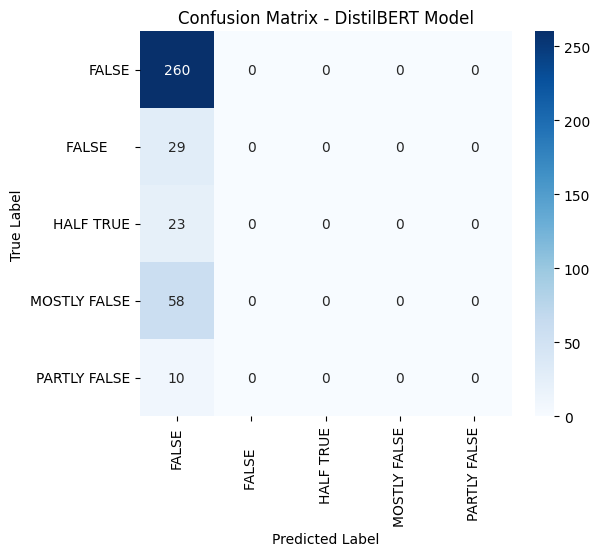

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - DistilBERT Model")
plt.show()


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import nltk

# Download stopwords (if not already downloaded)
nltk.download('stopwords')

# **Preprocessing Function**
def preprocess_text(texts):
    def clean_text(text):
        # Remove URLs, mentions, hashtags, special characters
        text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", text)
        text = re.sub(r"[^\w\s]", "", text)  # Remove special characters
        return text.lower()  # Convert to lowercase

    # Apply cleaning
    return texts.apply(clean_text)

# Load the training dataset
data = pd.read_csv("/content/drive/MyDrive/fake_news_classification_mal_train.csv")  # Replace with your file path

# Extract features and labels
X = data["News"]  # The text content
y = data["Label"]  # The target labels

# Preprocess the text
X = preprocess_text(X)

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Extract features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words=None)
X_tfidf = tfidf.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Train the SVM model
svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = svm_model.predict(X_test)

# Decode predictions and true labels to their original string values
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_))

# Save predictions for test dataset
# Load the test data
test_data = pd.read_excel("/content/drive/MyDrive/fake_news_classification_mal_test.xlsx")  # Replace with your test file path

# Preprocess the test data
test_data["News"] = preprocess_text(test_data["News"])
test_tfidf = tfidf.transform(test_data["News"])

# Predict for test data
test_predictions = svm_model.predict(test_tfidf)
predicted_labels = label_encoder.inverse_transform(test_predictions)
# Save only the `Id` and predicted labels
output_df = pd.DataFrame({
    "S.no": test_data["S.no"],
    "Labels": predicted_labels
})

# Save the predictions to a TSV file
output_df.to_csv("/content/drive/MyDrive/Blue_Ray/Blue_ray_Malayalam_task2_run1.csv", sep=",", index=False)
print("Predictions saved to 'malayalam_news_predictions.tsv'")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.6710526315789473

Classification Report:
              precision    recall  f1-score   support

       FALSE       0.68      0.98      0.80       244
  FALSE            0.50      0.24      0.33        33
   HALF TRUE       1.00      0.06      0.11        33
MOSTLY FALSE       0.55      0.10      0.17        59
PARTLY FALSE       1.00      0.09      0.17        11

    accuracy                           0.67       380
   macro avg       0.75      0.29      0.32       380
weighted avg       0.68      0.67      0.58       380

Predictions saved to 'malayalam_news_predictions.tsv'


<ipython-input-7-eab15e70703d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=models, palette="Blues_r")


TypeError: text() missing 1 required positional argument: 's'

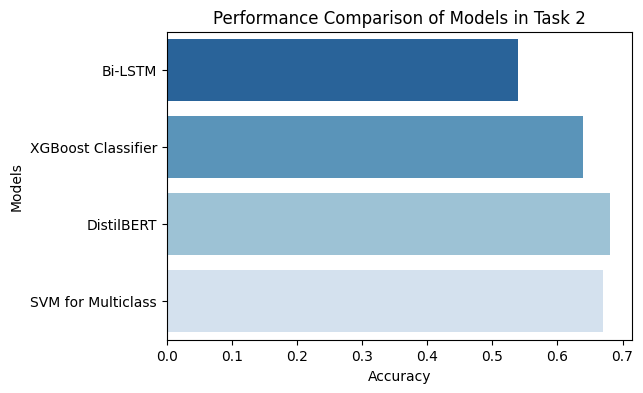

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their corresponding accuracy scores
models = ["Bi-LSTM", "XGBoost Classifier", "DistilBERT", "SVM for Multiclass"]
accuracies = [0.54, 0.64, 0.68, 0.67]

# Set the figure size
plt.figure(figsize=(6, 4))

# Use seaborn for better visualization
sns.barplot(x=accuracies, y=models, palette="Blues_r")

# Add labels and title
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Performance Comparison of Models in Task 2")

# Display accuracy values on the bars
for index, value in enumerate(accuracies):
    plt.text(value + 0.01, index)

# Show the plot
plt.show()


<ipython-input-10-783fa747a8df>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=models, palette="Greens_r")


TypeError: text() missing 1 required positional argument: 's'

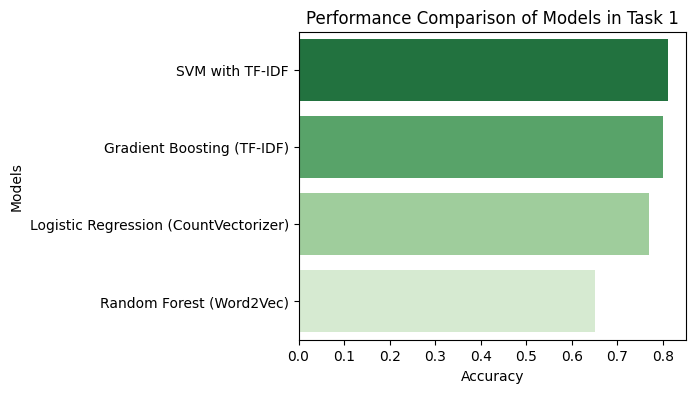

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their corresponding accuracy scores
models = ["SVM with TF-IDF", "Gradient Boosting (TF-IDF)", "Logistic Regression (CountVectorizer)", "Random Forest (Word2Vec)"]
accuracies = [0.81, 0.80, 0.77, 0.65]

# Set the figure size
plt.figure(figsize=(5, 4))

# Use seaborn for better visualization
sns.barplot(x=accuracies, y=models, palette="Greens_r")

# Add labels and title
plt.xlabel("Accuracy")
plt.ylabel("Models")
plt.title("Performance Comparison of Models in Task 1")

# Display accuracy values on the bars
for index, value in enumerate(accuracies):
    plt.text(value + 0.01, index)

# Show the plot
plt.show()


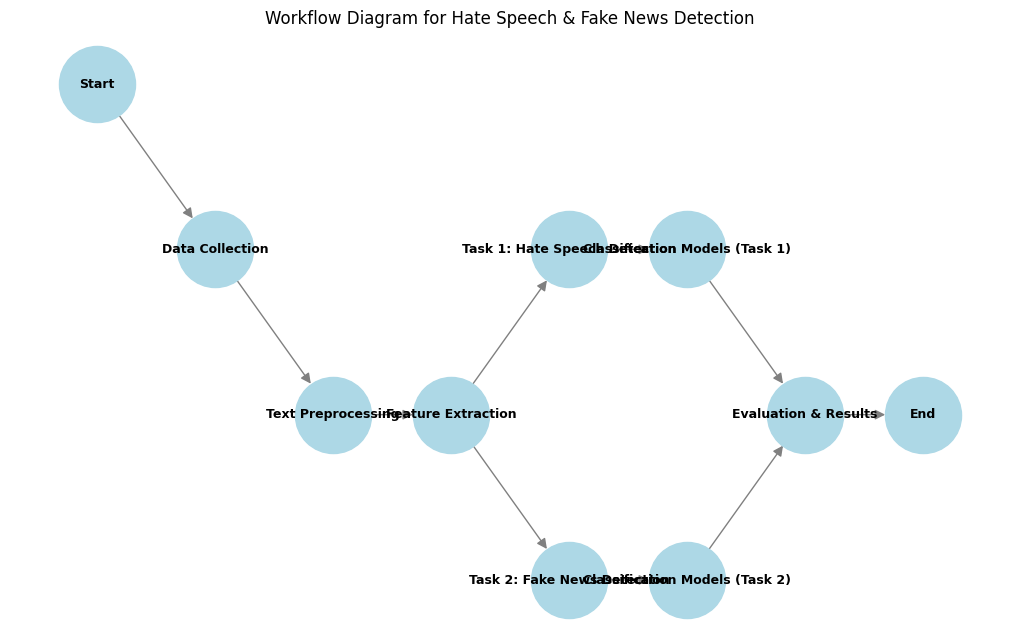

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define workflow steps
nodes = {
    "Start": (0, 5),
    "Data Collection": (1, 4),
    "Text Preprocessing": (2, 3),
    "Feature Extraction": (3, 3),
    "Task 1: Hate Speech Detection": (4, 4),
    "Task 2: Fake News Detection": (4, 2),
    "Classification Models (Task 1)": (5, 4),
    "Classification Models (Task 2)": (5, 2),
    "Evaluation & Results": (6, 3),
    "End": (7, 3)
}

# Add edges to show process flow
edges = [
    ("Start", "Data Collection"),
    ("Data Collection", "Text Preprocessing"),
    ("Text Preprocessing", "Feature Extraction"),
    ("Feature Extraction", "Task 1: Hate Speech Detection"),
    ("Feature Extraction", "Task 2: Fake News Detection"),
    ("Task 1: Hate Speech Detection", "Classification Models (Task 1)"),
    ("Task 2: Fake News Detection", "Classification Models (Task 2)"),
    ("Classification Models (Task 1)", "Evaluation & Results"),
    ("Classification Models (Task 2)", "Evaluation & Results"),
    ("Evaluation & Results", "End")
]

# Create the graph structure
for node, pos in nodes.items():
    G.add_node(node, pos=pos)

for edge in edges:
    G.add_edge(*edge)

# Get positions for nodes
pos = {node: (x, y) for node, (x, y) in nodes.items()}

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000, font_size=9, font_weight="bold", arrowsize=15)

# Display the workflow diagram
plt.title("Workflow Diagram for Hate Speech & Fake News Detection")
plt.show()


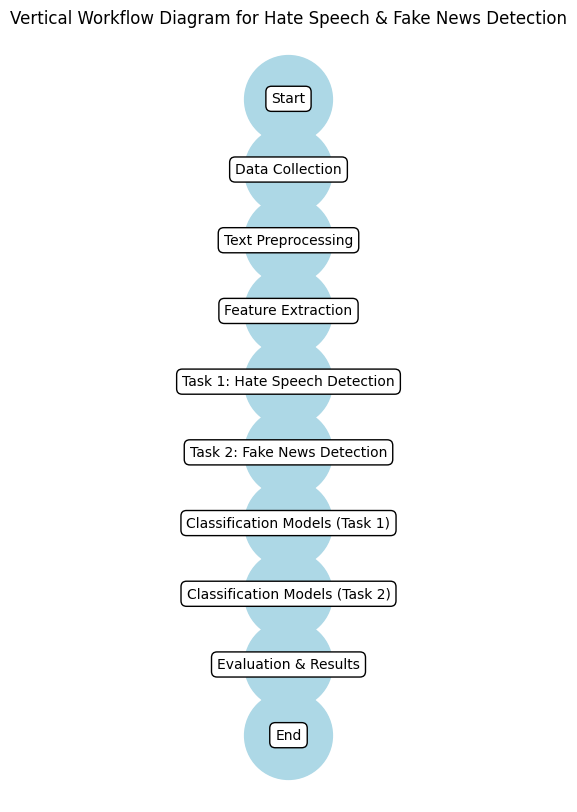

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define workflow steps
nodes = {
    "Start": (5, 10),
    "Data Collection": (5, 9),
    "Text Preprocessing": (5, 8),
    "Feature Extraction": (5, 7),
    "Task 1: Hate Speech Detection": (5, 6),
    "Task 2: Fake News Detection": (5, 5),
    "Classification Models (Task 1)": (5, 4),
    "Classification Models (Task 2)": (5, 3),
    "Evaluation & Results": (5, 2),
    "End": (5, 1)
}

# Add edges to show process flow
edges = [
    ("Start", "Data Collection"),
    ("Data Collection", "Text Preprocessing"),
    ("Text Preprocessing", "Feature Extraction"),
    ("Feature Extraction", "Task 1: Hate Speech Detection"),
    ("Feature Extraction", "Task 2: Fake News Detection"),
    ("Task 1: Hate Speech Detection", "Classification Models (Task 1)"),
    ("Task 2: Fake News Detection", "Classification Models (Task 2)"),
    ("Classification Models (Task 1)", "Evaluation & Results"),
    ("Classification Models (Task 2)", "Evaluation & Results"),
    ("Evaluation & Results", "End")
]

# Create the graph structure
for node, pos in nodes.items():
    G.add_node(node, pos=pos)

for edge in edges:
    G.add_edge(*edge)

# Get positions for nodes
pos = {node: (x, y) for node, (x, y) in nodes.items()}

# Define node labels
labels = {node: f"{node}" for node in nodes}

# Draw the graph
plt.figure(figsize=(6, 10))
ax = plt.gca()
nx.draw(G, pos, with_labels=False, node_color="lightblue", edge_color="gray", node_size=4000, font_size=10, font_weight="bold", arrows=True, arrowsize=15)

# Draw rectangular boxes around text
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=10, ha="center", va="center",
             bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.4"))

# Display the workflow diagram
plt.title("Vertical Workflow Diagram for Hate Speech & Fake News Detection")
plt.show()


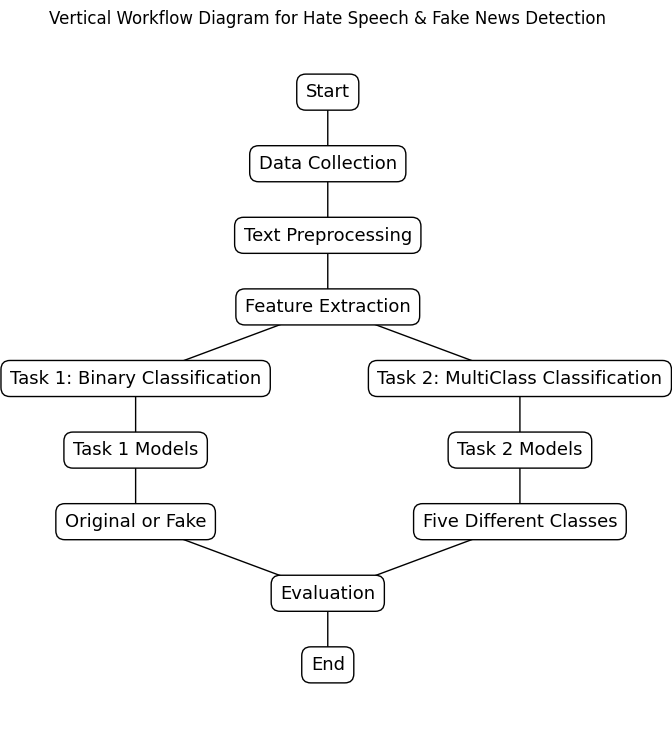

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define workflow steps and their positions
nodes = {
    "Start": (0, 10),
    "Data Collection": (0, 9),
    "Text Preprocessing": (0, 8),
    "Feature Extraction": (0, 7),
    "Task 1: Binary Classification": (-1, 6),
    "Task 2: MultiClass Classification": (1, 6),
    "Task 1 Models": (-1, 5),
    "Task 2 Models": (1, 5),
    "Original or Fake": (-1, 4),
    "Five Different Classes": (1, 4),
    "Evaluation": (0, 3),
    "End": (0, 2)
}

# Define edges for the correct workflow
edges = [
    ("Start", "Data Collection"),
    ("Data Collection", "Text Preprocessing"),
    ("Text Preprocessing", "Feature Extraction"),
    ("Feature Extraction", "Task 1: Binary Classification"),
    ("Feature Extraction", "Task 2: MultiClass Classification"),
    ("Task 1: Binary Classification", "Task 1 Models"),
    ("Task 2: MultiClass Classification", "Task 2 Models"),
    ("Task 1 Models", "Original or Fake"),
    ("Task 2 Models", "Five Different Classes"),
    ("Original or Fake", "Evaluation"),
    ("Five Different Classes", "Evaluation"),
    ("Evaluation", "End")
]

# Create graph structure
for node, pos in nodes.items():
    G.add_node(node, pos=pos)

for edge in edges:
    G.add_edge(*edge)

# Get positions for nodes
pos = {node: (x, y) for node, (x, y) in nodes.items()}

# Define labels
labels = {node: node for node in nodes}

# Draw the graph with rectangles only (no circles)
plt.figure(figsize=(6, 9))
ax = plt.gca()
nx.draw(G, pos, with_labels=False, edge_color="black", node_size=0, font_size=10, arrows=True, arrowsize=10)

# Add rectangular boxes around text (without circles)
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=13, ha="center", va="center",
             bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.5"))

# Display the final workflow diagram
plt.title("Vertical Workflow Diagram for Hate Speech & Fake News Detection")
plt.show()
